## Homework 3
### Mathematical & Computational Modeling of Infectious Diseases
#### Caleb Cordsen

In [1]:
# Import numpy for linspace and matplotlib 
import numpy as np
import matplotlib.pylab as plt
import math
from scipy.optimize import fsolve
from scipy.stats import nbinom

#### <u>Problem 2</u>

In [2]:
# Define a function that will simulate and model our epidemic with different populations
def SIR4Pop(deltaT,timeEnd,plot):
    # Set up initial value lists
    s1Val = [0.999/4]
    s2Val = [0.999/4]
    s3Val = [0.999/4]
    s4Val = [0.999/4]
    i1Val = [0.001/4]
    i2Val = [0.001/4]
    i3Val = [0.001/4]
    i4Val = [0.001/4]
    pVal = [((1*0.999/4)+(2*0.999/4)+(3*0.999/4)+(4*0.999/4))/0.999]
    # Set a counter at t = 0. Then use a while loop to construct the list of time values by appending the counter and then incrementing it
    # by deltaT
    counter = 0
    # Set up an empty list of time values
    time = []
    while counter<=timeEnd:
        time.append(counter)
        counter += deltaT
    # Loop through the time values getting both their position in the list and their actual time value t
    for index,value in enumerate(time):
        # If it it the first value in the list we can move on
        if(index!=0):
            # Grab the previous s,i values from the list
            s1Prev = s1Val[index-1]
            s2Prev = s2Val[index-1]
            s3Prev = s3Val[index-1]
            s4Prev = s4Val[index-1]
            i1Prev = i1Val[index-1]
            i2Prev = i2Val[index-1]
            i3Prev = i3Val[index-1]
            i4Prev = i4Val[index-1]
            
            # Calculate new values based on substitution into lecture note equations
            i1New = i1Prev + deltaT*((9*s1Prev*(i1Prev+i2Prev+i3Prev+i4Prev))/5-3*i1Prev)
            s1New = s1Prev + deltaT*(-(9*s1Prev*(i1Prev+i2Prev+i3Prev+i4Prev))/5)
            
            i2New = i2Prev + deltaT*((18*s2Prev*(i1Prev+i2Prev+i3Prev+i4Prev))/5-3*i2Prev)
            s2New = s2Prev + deltaT*(-(18*s2Prev*(i1Prev+i2Prev+i3Prev+i4Prev))/5)
            
            i3New = i3Prev + deltaT*((27*s3Prev*(i1Prev+i2Prev+i3Prev+i4Prev))/5-3*i3Prev)
            s3New = s3Prev + deltaT*(-(27*s3Prev*(i1Prev+i2Prev+i3Prev+i4Prev))/5)
            
            i4New = i4Prev + deltaT*((36*s4Prev*(i1Prev+i2Prev+i3Prev+i4Prev))/5-3*i4Prev)
            s4New = s4Prev + deltaT*(-(36*s4Prev*(i1Prev+i2Prev+i3Prev+i4Prev))/5)
            
            pNew = ((1*s1New)+(2*s2New)+(3*s3New)+(4*s4New))/(s1New+s2New+s3New+s4New)
            
            s1Val.append(s1New)
            i1Val.append(i1New)
            s2Val.append(s2New)
            i2Val.append(i2New)
            s3Val.append(s3New)
            i3Val.append(i3New)
            s4Val.append(s4New)
            i4Val.append(i4New)
            pVal.append(pNew)
    plt.title("Caleb's SIR Simulation With 4 Populations")
    plt.xlabel("Time")
    plt.ylabel("Proportion of Total Population")
    plt.xlim([0,timeEnd])
    # The user can choose what kind of things they want on the plot i, s, pbar, pbar and s
    if plot == 1:
        plt.plot(time,i1Val,"red",label="i1",alpha=0.1)
        plt.plot(time,i2Val,"red",label="i2",alpha=0.3)
        plt.plot(time,i3Val,"red",label="i3",alpha=0.5)
        plt.plot(time,i4Val,"red",label="i4",alpha=1)
    elif plot == 2:
        plt.plot(time,s1Val,"red",label="s1",alpha=0.1)
        plt.plot(time,s2Val,"red",label="s2",alpha=0.3)
        plt.plot(time,s3Val,"red",label="s3",alpha=0.5)
        plt.plot(time,s4Val,"red",label="s4",alpha=1)
    elif plot == 3:
        plt.plot(time,s1Val,"red",label="s1",alpha=0.1)
        plt.plot(time,s2Val,"red",label="s2",alpha=0.3)
        plt.plot(time,s3Val,"red",label="s3",alpha=0.5)
        plt.plot(time,s4Val,"red",label="s4",alpha=1)
        plt.plot(time,pVal,"black",label="pbar")
    elif plot == 4:
        plt.plot(time,pVal,"black",label="pbar")
    # Set the legends location
    plt.legend(loc="upper right")
    plt.show()

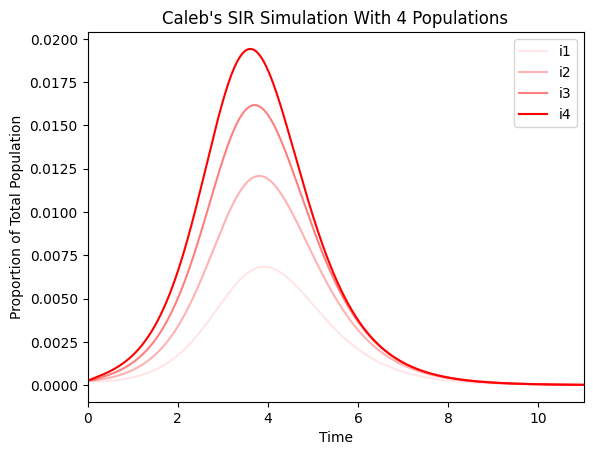

In [3]:
SIR4Pop(0.01,11,1)

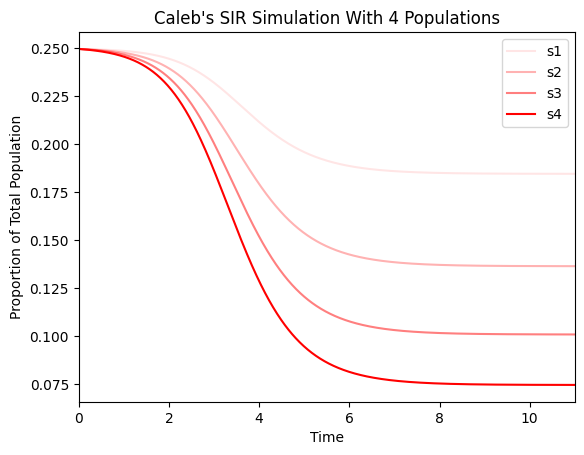

In [4]:
SIR4Pop(0.01,11,2)

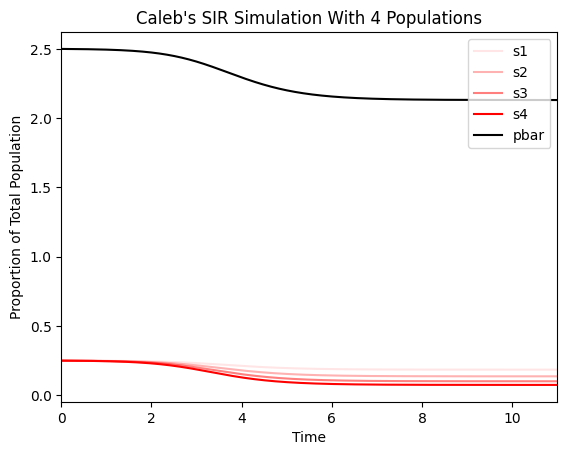

In [5]:
SIR4Pop(0.01,11,3)

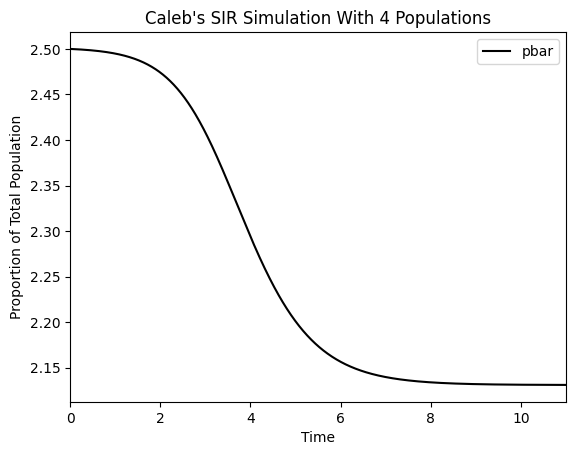

In [6]:
SIR4Pop(0.01,11,4)

#### <u>Problem 3</u>
Note because of a kernel restart to make sure all code still worked before putting it on GitHub the outputs within the homework and that are active in this notebook now are not exactly the same due to the randomness of Problem 3

In [7]:
# Define a function negative_binom_branching_process that will simulate a branching process from a single infection
# drawing from a negative binom distribution. It takes in and R-naught value in R0, a k value that represents dispersion, and 
# G the number of generations to simulate
# Heavily inspired by code from within the Homework and from lecture
def negative_binom_branching_process(R0,k,G):
    mean = R0
    variance = mean+(mean**2)/k
    p= mean/variance
    n = mean**2 / (variance-mean)
    
    z = np.zeros(G,dtype=int)
    z[0] = 1
    for generation in np.arange(1,G):
        draw = np.sum(nbinom.rvs(n=n,p=p,size=z[generation-1]))
        z[generation] = draw
        if(draw==0):
            break
    return z

In [35]:
# Testing
negative_binom_branching_process(3,0.1,16)

array([      1,      11,      20,      14,      30,      54,     221,
           767,    1909,    5097,   15634,   47854,  147805,  437981,
       1303631, 3899636])

Text(0, 0.5, 'branching process size')

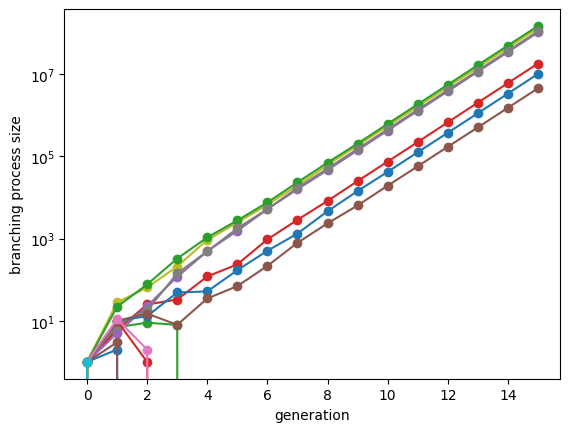

In [9]:
# Taken from lecture code and used to determine a reasonable generation count to use
fig,ax = plt.subplots()

for i in range(30):
    trajectory = negative_binom_branching_process(3,0.1,16)
    ax.semilogy(trajectory,'-o')
    
ax.set_xlabel('generation')
ax.set_ylabel('branching process size')

Based on running the code above a couple times, I decided to go with 8 generations. It probably could have been earlier more like 6 or even 5 but I went with 8 to be safe

In [10]:
# Define a function estimateQ that takes in a number of trials to perform
def estimateQ(trials):
    # This our list of different k values to try. Set up a list of zeros that will count how many times each k has
    # a branching process that dies out
    kList = [0.1,0.5,1,5,10]
    zeroList = [0,0,0,0,0]
    # Run for the number of trials
    for i in range(trials):
        # Loop through the k list and do a branching process. If it dies off add 1 to the died off count in zeroList
        for index,k in enumerate(kList):
            result = negative_binom_branching_process(3,k,8)
            if 0 in result:
                zeroList[index] = zeroList[index]+1
    # Print informative recap information
    print("Number of Trials:"+str(trials))
    print(kList,"k Values")
    print(zeroList,"Raw Zero Counts (Counts of times epidemic dies in finite time")
    qList = [i/trials for i in zeroList]
    print(qList,"q Estimates")
    print("-------------------------")

In [11]:
# Estimate q for a couple different trial values
estimateQ(100)
estimateQ(1000)
estimateQ(5000)
estimateQ(10000)
estimateQ(50000)
estimateQ(100000)

Number of Trials:100
[0.1, 0.5, 1, 5, 10] k Values
[84, 48, 34, 14, 8] Raw Zero Counts (Counts of times epidemic dies in finite time
[0.84, 0.48, 0.34, 0.14, 0.08] q Estimates
-------------------------
Number of Trials:1000
[0.1, 0.5, 1, 5, 10] k Values
[830, 496, 364, 107, 87] Raw Zero Counts (Counts of times epidemic dies in finite time
[0.83, 0.496, 0.364, 0.107, 0.087] q Estimates
-------------------------
Number of Trials:5000
[0.1, 0.5, 1, 5, 10] k Values
[4181, 2431, 1693, 590, 451] Raw Zero Counts (Counts of times epidemic dies in finite time
[0.8362, 0.4862, 0.3386, 0.118, 0.0902] q Estimates
-------------------------
Number of Trials:10000
[0.1, 0.5, 1, 5, 10] k Values
[8407, 4995, 3330, 1180, 898] Raw Zero Counts (Counts of times epidemic dies in finite time
[0.8407, 0.4995, 0.333, 0.118, 0.0898] q Estimates
-------------------------
Number of Trials:50000
[0.1, 0.5, 1, 5, 10] k Values
[41780, 24789, 16551, 6047, 4524] Raw Zero Counts (Counts of times epidemic dies in finite

In [12]:
# Define a function get 100000 finite size that will get 100000 finite sizes
def finiteLargeness():
    # Counter to get to 100000
    counter = 0
    # kList
    kList = [0.1,0.5,1,5,10]
    # countList
    countList = []
    while counter<=100000:
        for k in kList:
            result = negative_binom_branching_process(3,k,8)
            # If it is finite increase counter, sum the infections in the outbreak and add to the countList
            if 0 in result:
                counter+=1
                totalInf = np.sum(result)
                countList.append(totalInf)
                if counter == 100000:
                    return countList

In [13]:
x = finiteLargeness()

In [14]:
print(min(x))
print(max(x))
print(len(x))

1
76
100000


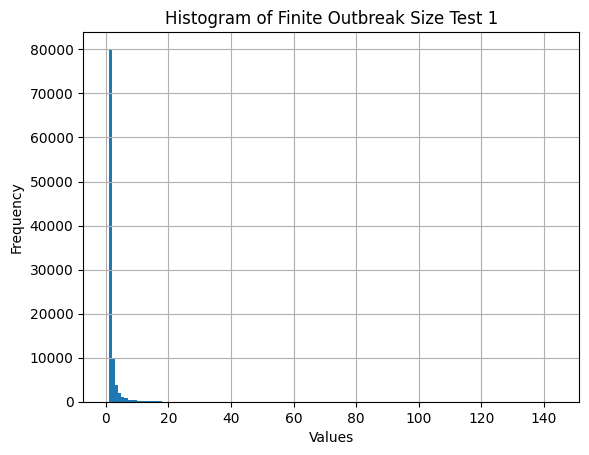

In [15]:
plt.hist(x, bins=range(0, 145,1))  # Customize bin edges
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Finite Outbreak Size Test 1')
plt.grid(True)
plt.show()

In [16]:
y = finiteLargeness()
print(min(y))
print(max(y))
print(len(y))

1
67
100000


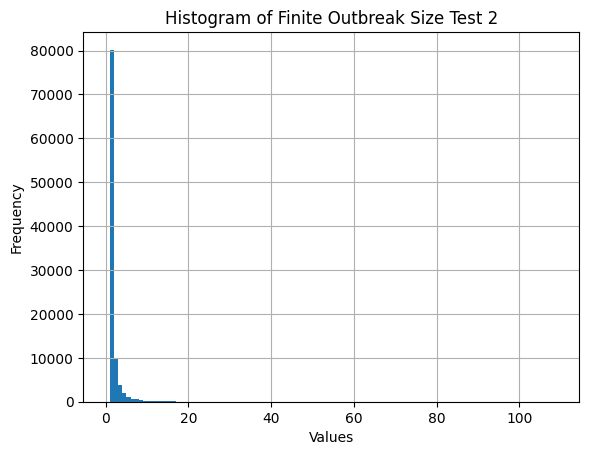

In [17]:
plt.hist(y, bins=range(0, 110,1))  # Customize bin edges
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Finite Outbreak Size Test 2')
plt.grid(True)
plt.show()